    template
    Please use this template when summarizing your findings from different ML models.

    Of course you can alter and add new subsections as needed.

    Note on file name: Files should be named 1.0-Model-name.ipynb

# "Model Name"

_short description of the model used. [References](https://sv.wikipedia.org/wiki/Referens) can be used_

## Outline
1. Preprocessing
2. Model exploration
    * _first we..._
    * _then we..._
3. Summary of Results

# Preprocessing

## import external packages

In [1]:
import matplotlib.pyplot as plt

## import internal utils

In [2]:
from utils.import_data import importData
from utils.model_tester import ModelTester

## data

In [3]:
file_data = "data2.csv"
file_labels = "labels2.csv"
n_features = -1
directory = "\data\\"

data, labels = importData(file_data, file_labels, directory, n_features, iterations=False)

Number of samples:    102400
Number of features:   3851


In [4]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,3841,3842,3843,3844,3845,3846,3847,3848,3849,3850
0,-0.044802,2.487497,-0.525579,-0.429161,-0.114088,0.383844,0.501104,1.236488,-1.150935,-0.991978,...,-2.811259,2.033049,1.217821,-1.078442,2.040776,-1.411063,2.693125,1.433417,0.80536,-1.174291


In [5]:
labels.head(4)

,label,binary-label,iteration
0,0.0,0,0
1,372930.0,1,0
2,135370.0,1,0
3,1060864.0,1,0


# Model exploration

In [4]:
# code to setup model environment

# import model
from sklearn.neighbors import KNeighborsClassifier

# initialize object
mt = ModelTester(data, labels, KNeighborsClassifier, n_neighbors = 3) # everything after the model are the hyperparameters

# test to see that it was initialized correctly
print(mt.model(**mt.parameters))

KNeighborsClassifier(n_neighbors=3)


## initial test

In [5]:
# code
sampling = 'under' # can be 'under', 'over' or nothing

# run the training loop
mt.training_loop(sampling = sampling)

Iter lag 0:
	Iteration 1 complete in 2.2 seconds
	Iteration 2 complete in 2.2 seconds
	Iteration 3 complete in 2.2 seconds
	Iteration 4 complete in 2.2 seconds
	Iteration 5 complete in 2.2 seconds
	Iteration 6 complete in 2.2 seconds
	Iteration 7 complete in 2.1 seconds
	Iteration 8 complete in 2.2 seconds
	Iteration 9 complete in 2.3 seconds
	Iteration 10 complete in 2.3 seconds
Iter lag 1:
	Iteration 1 complete in 2.2 seconds
	Iteration 2 complete in 2.1 seconds
	Iteration 3 complete in 2.2 seconds
	Iteration 4 complete in 2.2 seconds
	Iteration 5 complete in 2.3 seconds
	Iteration 6 complete in 2.3 seconds
	Iteration 7 complete in 2.2 seconds
	Iteration 8 complete in 2.2 seconds
	Iteration 9 complete in 2.2 seconds
	Iteration 10 complete in 2.1 seconds
Iter lag 2:
	Iteration 1 complete in 2.2 seconds
	Iteration 2 complete in 2.2 seconds
	Iteration 3 complete in 2.3 seconds
	Iteration 4 complete in 2.2 seconds
	Iteration 5 complete in 2.2 seconds
	Iteration 6 complete in 2.2 seconds


In [6]:
# let's look at some results
mt.print_essentials(run = 0)    # select the run

variable                             average    std  95.0% CI          min    max
---------------------------------  ---------  -----  --------------  -----  -----
weighted accuracy [%]                  49.65   1.2   (48.79, 50.51)  47.23  51.73
duration [s]                            2.21   0.04  (2.18, 2.24)     2.15   2.28
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)  77.25  85.45
infeasible_guessed_percentage [%]      35.62  14.46  (25.27, 45.96)  14.84  54.79
feasible_recall [%]                    63.8   14.92  (53.12, 74.47)  42.11  85.45
feasible_precision [%]                 17.26   2.56  (15.43, 19.09)  13.74  22.65
infeasible_recall [%]                  35.5   14.41  (25.19, 45.81)  14.91  54.86
infeasible_precision [%]               82.33   2.47  (80.56, 84.09)  76.92  86
AUC                                     0.5    0.01  (0.49, 0.51)     0.47   0.52


Training times:


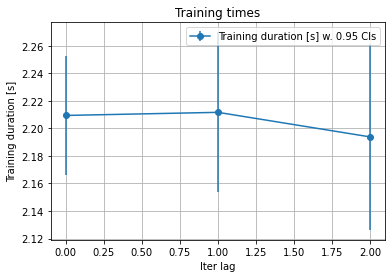

Weighted accuracies


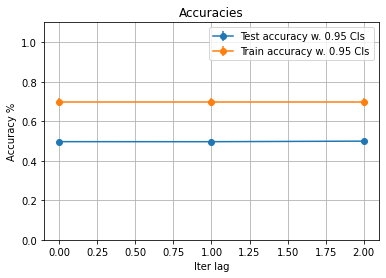

Test accuracies: [0.49649393 0.49627033 0.49909172]
Confusion matrices:


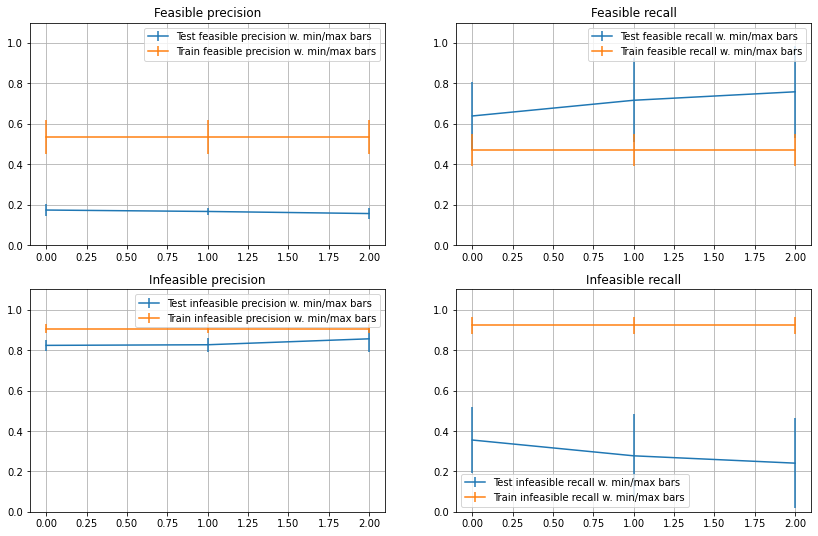

Percentage infeasible on test data:


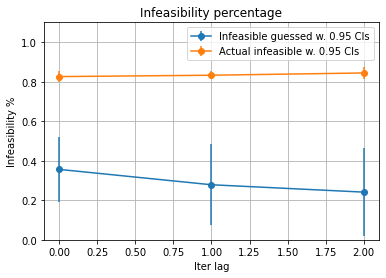

Percentage infeasible on train data:


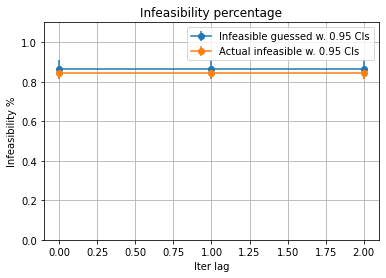

AUC on test data:


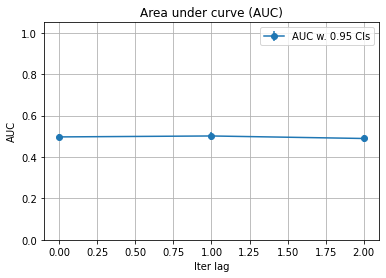

AUC on train data:


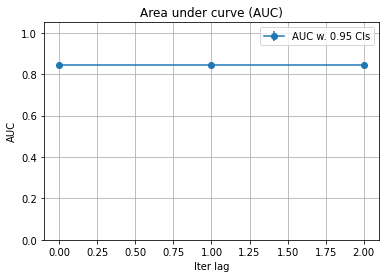

In [7]:
mt.plot_graphs()

## Hyperparameter tuning

In [8]:
# code
mt.hyperparameter_tuning(KNeighborsClassifier, 2, n_neighbors = [1, 2, 3, 4, 5])


The grid search is complete, here are the results:

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.057040      0.001631         0.036922        0.002746   
1       0.056743      0.000672         0.040471        0.000595   
2       0.058330      0.002380         0.039978        0.001736   
3       0.056942      0.000580         0.041167        0.001470   
4       0.058529      0.002856         0.041034        0.000633   

  param_n_neighbors              params  split0_test_score  split1_test_score  \
0                 1  {'n_neighbors': 1}           0.491018           0.554016   
1                 2  {'n_neighbors': 2}           0.489943           0.542821   
2                 3  {'n_neighbors': 3}           0.543011           0.524415   
3                 4  {'n_neighbors': 4}           0.533460           0.505756   
4                 5  {'n_neighbors': 5}           0.545225           0.501139   

   split2_test_score  split3_test_score  split4_test_scor

In [9]:
# let's check the new parameters
mt.parameters

{'n_neighbors': 1}

# Results

In [10]:
# re-train
sampling = 'under' # can be 'under', 'over' or nothing

# run the training loop
mt.training_loop(sampling = sampling)

Iter lag 0:
	Iteration 1 complete in 2.2 seconds
	Iteration 2 complete in 2.2 seconds
	Iteration 3 complete in 2.2 seconds
	Iteration 4 complete in 2.1 seconds
	Iteration 5 complete in 2.2 seconds
	Iteration 6 complete in 2.1 seconds
	Iteration 7 complete in 2.2 seconds
	Iteration 8 complete in 2.1 seconds
	Iteration 9 complete in 2.1 seconds
	Iteration 10 complete in 2.1 seconds
Iter lag 1:
	Iteration 1 complete in 2.1 seconds
	Iteration 2 complete in 2.1 seconds
	Iteration 3 complete in 2.3 seconds
	Iteration 4 complete in 2.3 seconds
	Iteration 5 complete in 2.1 seconds
	Iteration 6 complete in 2.2 seconds
	Iteration 7 complete in 2.1 seconds
	Iteration 8 complete in 2.1 seconds
	Iteration 9 complete in 2.1 seconds
	Iteration 10 complete in 2.1 seconds
Iter lag 2:
	Iteration 1 complete in 2.0 seconds
	Iteration 2 complete in 2.2 seconds
	Iteration 3 complete in 2.1 seconds
	Iteration 4 complete in 2.1 seconds
	Iteration 5 complete in 2.1 seconds
	Iteration 6 complete in 2.1 seconds


In [11]:
mt.print_essentials(run = 0)

variable                             average    std  95.0% CI          min    max
---------------------------------  ---------  -----  --------------  -----  -----
weighted accuracy [%]                  49.25   1.12  (48.45, 50.05)  47.22  51.1
duration [s]                            2.15   0.03  (2.13, 2.17)     2.11   2.19
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)  77.25  85.45
infeasible_guessed_percentage [%]      34.64  11.07  (26.72, 42.56)  18.99  49.8
feasible_recall [%]                    64.11  11.61  (55.81, 72.42)  45.51  79.48
feasible_precision [%]                 17.1    2.58  (15.25, 18.94)  13.56  22.76
infeasible_recall [%]                  34.39  11.01  (26.52, 42.27)  18.64  49.77
infeasible_precision [%]               81.95   2.36  (80.26, 83.64)  77.27  85.73
AUC                                     0.49   0.01  (0.49, 0.5)      0.48   0.51


Training times:


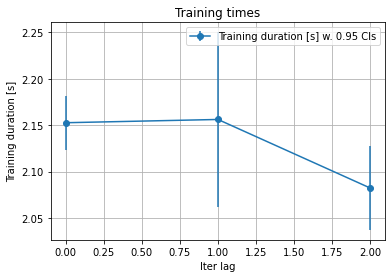

Weighted accuracies


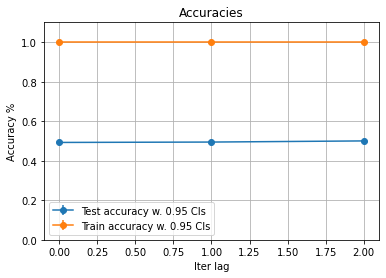

Test accuracies: [0.49252789 0.49446573 0.5002412 ]
Confusion matrices:


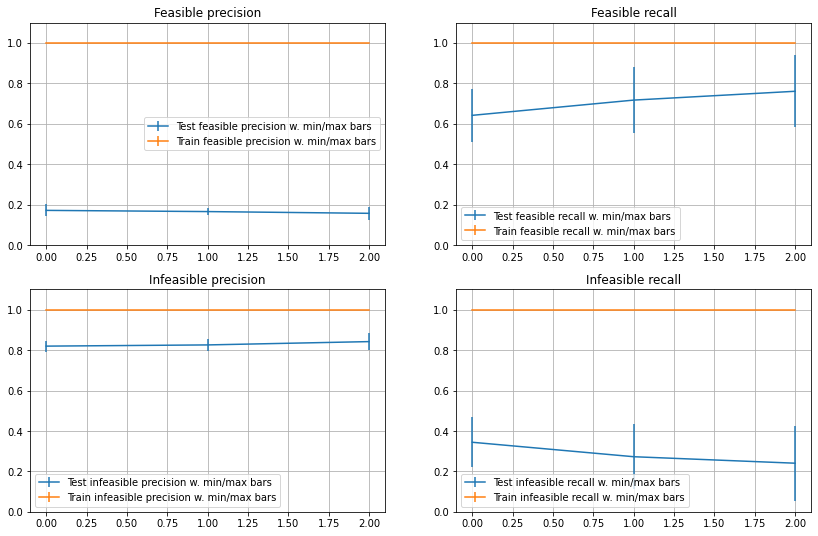

Percentage infeasible on test data:


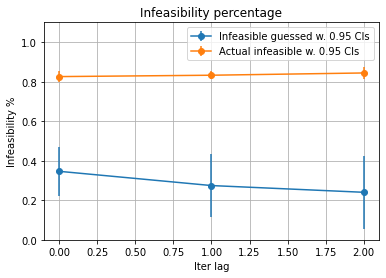

Percentage infeasible on train data:


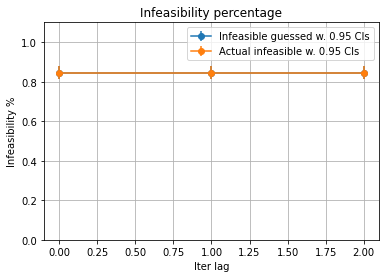

AUC on test data:


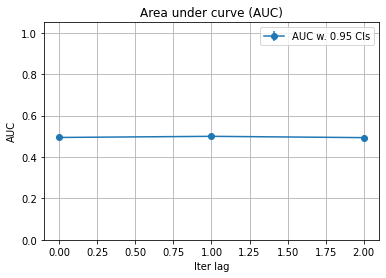

AUC on train data:


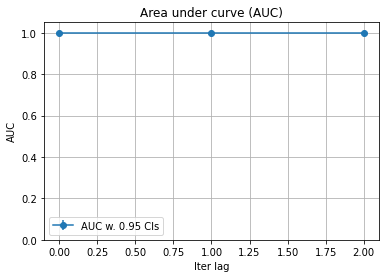

In [12]:
mt.plot_graphs()

In [ ]:
# results!